<a href="https://colab.research.google.com/github/chaveroricardo/perceptron/blob/main/Notebooks/EsophagusCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Path to the pickle file with preprocessed images
ruta2 = '/content/drive/MyDrive/MLBusiness/'
pickle_file_path = ruta2 + "imagenes_numpy.pkl"
# Load the image data from pickle file
with open(pickle_file_path, 'rb') as f:
    X = pickle.load(f)

# Verify the data
print("Loaded image data shape:", X.shape)

Loaded image data shape: (5063,)


In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/AnIsAsPe/ClassificadorCancerEsofago/master/Datos/ClasesImagenes.csv", usecols=[1,2])
y = data['class_number'].values

print("Labels shape:", y.shape)


Labels shape: (5063,)


In [7]:
pickle_file_path = np.stack(X, axis=0)   # Takes a sequence of matrices and stacks them along
                              # a third axis to make a single array
pickle_file_path.shape


(5063, 260, 260)

In [8]:
X = pickle_file_path.reshape(5063, 67600)
X.shape

(5063, 67600)

In [9]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (3544, 67600)
Test set shape: (1519, 67600)


# **Perceptron Model**

Perceptron Performance:
Accuracy: 0.90
Recall: 0.94
Precision: 0.92
F1 Score: 0.93
ROC AUC: 0.95


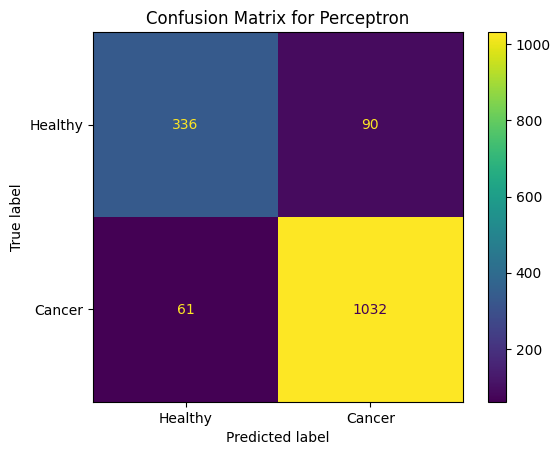

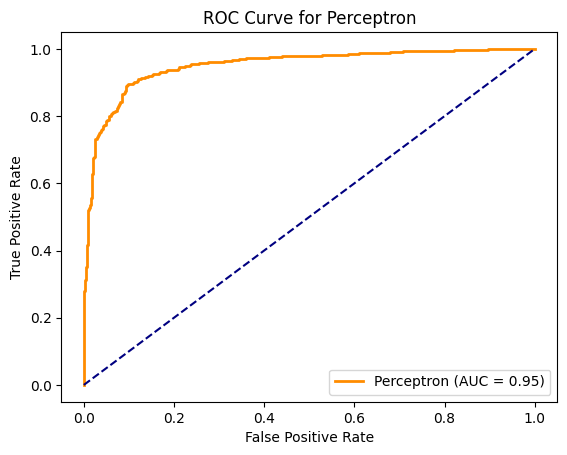

In [10]:
# Import necessary libraries
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the Perceptron model
perceptron = Perceptron(max_iter=1000, random_state=0, verbose=False, penalty='l2', alpha=0.000005)
perceptron.fit(X_train, y_train)

# Predictions and decision function for ROC AUC
y_pred_perceptron = perceptron.predict(X_test)
y_proba_perceptron = perceptron.decision_function(X_test)

# Evaluate the Perceptron model
accuracy = accuracy_score(y_test, y_pred_perceptron)
recall = recall_score(y_test, y_pred_perceptron)
precision = precision_score(y_test, y_pred_perceptron)
f1 = f1_score(y_test, y_pred_perceptron)
roc_auc = roc_auc_score(y_test, y_proba_perceptron)

# Display performance metrics
print("Perceptron Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(perceptron, X_test, y_test, display_labels=["Healthy", "Cancer"])
plt.title("Confusion Matrix for Perceptron")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_perceptron)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Perceptron (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Perceptron')
plt.legend(loc="lower right")
plt.show()


# **Random Forest Model**

Random Forest Performance:
Accuracy: 0.97
Recall: 1.00
Precision: 0.96
F1 Score: 0.98
ROC AUC: 0.99


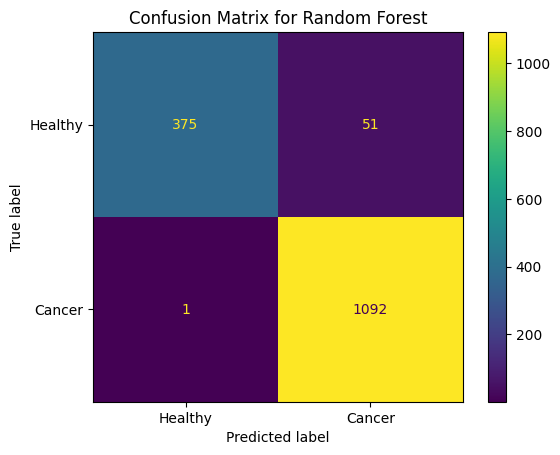

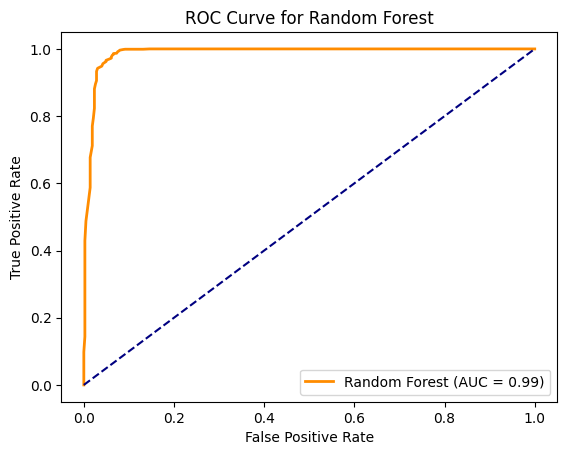

In [11]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(random_state=0, n_estimators=100)
random_forest.fit(X_train, y_train)

# Predictions and probability for ROC AUC
y_pred_rf = random_forest.predict(X_test)
y_proba_rf = random_forest.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
accuracy = accuracy_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)

# Display performance metrics
print("Random Forest Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test, display_labels=["Healthy", "Cancer"])
plt.title("Confusion Matrix for Random Forest")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


# **Linear Kernel**

In [ ]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize and train the SVC model with linear kernel
svc_model = SVC(kernel='linear', random_state=42, probability=True)  # `probability=True` for ROC AUC calculation
svc_model.fit(X_train, y_train)

# Predictions and probability for ROC AUC
y_pred_svc = svc_model.predict(X_test)
y_proba_svc = svc_model.predict_proba(X_test)[:, 1]

# Evaluate the SVC model
accuracy = accuracy_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)
roc_auc = roc_auc_score(y_test, y_proba_svc)

# Display performance metrics
print("SVC with Linear Kernel Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svc_model, X_test, y_test, display_labels=["Healthy", "Cancer"])
plt.title("Confusion Matrix for SVC with Linear Kernel")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_svc)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVC with Linear Kernel (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC with Linear Kernel')
plt.legend(loc="lower right")
plt.show()


# **Summary and Best Model Selection**

In [1]:
# Final Summary of All Models

# Store metrics for each model based on previously printed results
model_performance = {
    "Perceptron": {"Accuracy": 0.90, "Recall": 0.94, "Precision": 0.92, "F1 Score": 0.93, "ROC AUC": 0.95},
    "Random Forest": {"Accuracy": 0.97, "Recall": 1.00, "Precision": 0.96, "F1 Score": 0.98, "ROC AUC": 0.99},
}

# Find the best model based on ROC AUC
best_model_name = max(model_performance, key=lambda k: model_performance[k]["ROC AUC"])
best_model_metrics = model_performance[best_model_name]

# Display performance summary for each model
print("Performance Summary for All Models:\n")
for model_name, metrics in model_performance.items():
    print(f"Model: {model_name}")
    print(f"  Accuracy: {metrics['Accuracy']:.2f}")
    print(f"  Recall: {metrics['Recall']:.2f}")
    print(f"  Precision: {metrics['Precision']:.2f}")
    print(f"  F1 Score: {metrics['F1 Score']:.2f}")
    print(f"  ROC AUC: {metrics['ROC AUC']:.2f}\n")

# Print the best model's name and metrics
print(f"Best Model: {best_model_name}")
print("Best Model Metrics:")
print(f"  Accuracy: {best_model_metrics['Accuracy']:.2f}")
print(f"  Recall: {best_model_metrics['Recall']:.2f}")
print(f"  Precision: {best_model_metrics['Precision']:.2f}")
print(f"  F1 Score: {best_model_metrics['F1 Score']:.2f}")
print(f"  ROC AUC: {best_model_metrics['ROC AUC']:.2f}")


Performance Summary for All Models:

Model: Perceptron
  Accuracy: 0.90
  Recall: 0.94
  Precision: 0.92
  F1 Score: 0.93
  ROC AUC: 0.95

Model: Random Forest
  Accuracy: 0.97
  Recall: 1.00
  Precision: 0.96
  F1 Score: 0.98
  ROC AUC: 0.99

Best Model: Random Forest
Best Model Metrics:
  Accuracy: 0.97
  Recall: 1.00
  Precision: 0.96
  F1 Score: 0.98
  ROC AUC: 0.99
